# Code-Tober 2020 Workshop: <font color=skyblue>Data Analysis Workflow </font>

### October 8th, 2020

### Deniz Ölçek

This workshop aims to give an overview of the building blocks of data analysis workflow using ***Python Pandas*** module.

***Pandas User Guide***: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

We will be analyzing a combined dataset including global monthly merged ocean-land surface temperature change from NOAA: https://www.ncdc.noaa.gov/noaa-merged-land-ocean-global-surface-temperature-analysis-noaaglobaltemp-v5

### <font color=bblue> Elements of Data Analysis Workflow </font> 

In [1]:
# Importing libraries

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

### <font color=skyblue> Loading and reading the data </font>  

In [2]:
filePath = 'AvgMonthlyOceanLandTemp_90S90N_082020.csv'

NOAA_dataset = pd.read_csv(filePath, delimiter="\t")

To check the categories in the dataset:

In [3]:
NOAA_dataset.keys()

Index(['Year', 'Month', 'Land Δ(T) (C)', 'Ocean Δ(T) (C)',
       'Ocean-Land Δ(T) (C)'],
      dtype='object')

### <font color=skyblue> Listing the data elements  </font> 

In [4]:
NOAA_dataset

,Year,Month,Land Δ(T) (C),Ocean Δ(T) (C),Ocean-Land Δ(T) (C)
0,1880,1,-0.750855,-0.269550,-0.381889
1,1880,2,-1.215493,-0.286615,-0.488308
2,1880,3,-1.313627,-0.210014,-0.456202
3,1880,4,-0.906708,-0.217540,-0.387541
4,1880,5,-0.647808,NaN,-0.423262
...,...,...,...,...,...
1683,2020,4,1.187285,0.541520,0.715336
1684,2020,5,1.018085,0.470633,0.619258
1685,2020,6,0.963959,0.465016,0.600844
1686,2020,7,0.961946,0.480749,0.612323


In [5]:
# We can display as many ros as we wish. The default of .head() will show us the 5 top rows.
NOAA_dataset.head(10)

,Year,Month,Land Δ(T) (C),Ocean Δ(T) (C),Ocean-Land Δ(T) (C)
0,1880,1,-0.750855,-0.269550,-0.381889
1,1880,2,-1.215493,-0.286615,-0.488308
2,1880,3,-1.313627,-0.210014,-0.456202
3,1880,4,-0.906708,-0.217540,-0.387541
4,1880,5,-0.647808,NaN,-0.423262
5,1880,6,-0.540352,-0.426008,-0.450535
6,1880,7,-0.581144,-0.391768,-0.432511
7,1880,8,-0.551437,-0.315417,-0.368139
8,1880,9,-0.735647,-0.296275,NaN
9,1880,10,-0.954795,-0.384309,-0.505425


In [6]:
# To check the data types
NOAA_dataset.dtypes

Year                     int64
Month                    int64
Land Δ(T) (C)          float64
Ocean Δ(T) (C)         float64
Ocean-Land Δ(T) (C)    float64
dtype: object

In [7]:
# Displaying indiviual columns and rows

NOAA_dataset.iloc[[0],[0]] # Selecting single row and column

# print(NOAA_dataset.iloc[[0],[0]])

,Year
0,1880


In [8]:
NOAA_dataset.iloc[[0]] # Selecting a single row

,Year,Month,Land Δ(T) (C),Ocean Δ(T) (C),Ocean-Land Δ(T) (C)
0,1880,1,-0.750855,-0.26955,-0.381889


In [9]:
NOAA_dataset['Year'][:].head(20) # Selecting single column

0     1880
1     1880
2     1880
3     1880
4     1880
5     1880
6     1880
7     1880
8     1880
9     1880
10    1880
11    1880
12    1881
13    1881
14    1881
15    1881
16    1881
17    1881
18    1881
19    1881
Name: Year, dtype: int64

In [10]:
NOAA_dataset['Ocean Δ(T) (C)'][3:20]

3    -0.217540
4          NaN
5    -0.426008
6    -0.391768
7    -0.315417
8    -0.296275
9    -0.384309
10   -0.334612
11   -0.274358
12   -0.232162
13   -0.241878
14   -0.182379
15   -0.175446
16   -0.244916
17   -0.290397
18   -0.294874
19   -0.342943
Name: Ocean Δ(T) (C), dtype: float64

### <font color=skyblue> Data Manipulation  </font> 

We can change the order of columns:

In [11]:
# Restructuring the data frame
OceanLand = pd.DataFrame(NOAA_dataset, columns=['Ocean-Land Δ(T) (C)','Year','Month' ])

OceanLand

,Ocean-Land Δ(T) (C),Year,Month
0,-0.381889,1880,1
1,-0.488308,1880,2
2,-0.456202,1880,3
3,-0.387541,1880,4
4,-0.423262,1880,5
...,...,...,...
1683,0.715336,2020,4
1684,0.619258,2020,5
1685,0.600844,2020,6
1686,0.612323,2020,7


In [12]:
# Swapping rows ------------

df= pd.DataFrame(data = [[1,4],[8,6]], index=range(2), columns = ['A', 'B'])
a, b = df.iloc[0], df.iloc[1]
df

,A,B
0,1,4
1,8,6


In [13]:
temp = df.iloc[0].copy()  # copy of df.iloc[0]
df.iloc[0] = b
df.iloc[1] = temp
df

,A,B
0,8,6
1,1,4


We can create ***new columns*** and populate them. 

Let's rearrange the timestamps merging ***Year*** and ***Month*** together for convenience. We create a new column as follows:

In [14]:
NOAA_dataset['Timestamp'] = NOAA_dataset['Year'].map(str) + '-' + NOAA_dataset['Month'].map(str)

In [15]:
NOAA_dataset.head(10)

,Year,Month,Land Δ(T) (C),Ocean Δ(T) (C),Ocean-Land Δ(T) (C),Timestamp
0,1880,1,-0.750855,-0.269550,-0.381889,1880-1
1,1880,2,-1.215493,-0.286615,-0.488308,1880-2
2,1880,3,-1.313627,-0.210014,-0.456202,1880-3
3,1880,4,-0.906708,-0.217540,-0.387541,1880-4
4,1880,5,-0.647808,NaN,-0.423262,1880-5
5,1880,6,-0.540352,-0.426008,-0.450535,1880-6
6,1880,7,-0.581144,-0.391768,-0.432511,1880-7
7,1880,8,-0.551437,-0.315417,-0.368139,1880-8
8,1880,9,-0.735647,-0.296275,NaN,1880-9
9,1880,10,-0.954795,-0.384309,-0.505425,1880-10


### <font color=skyblue> How to work with NaNs / missing data points </font>  

`NaN`= not a number

First of all, let's find out how many NaNs there are in the data. We will use a method `isna()` which will return a dataframe of the same size of `NOAA_dataset` with only `True` or `False` values. `True` for when a value is NaN and `False` when the value is not NaN.

In [16]:
NOAA_dataset.isna().head(10)

,Year,Month,Land Δ(T) (C),Ocean Δ(T) (C),Ocean-Land Δ(T) (C),Timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,True,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,True,False
9,False,False,False,False,False,False


In [17]:
NOAA_dataset.isna().sum() # to display the total number of NaNs in each columns

Year                   0
Month                  0
Land Δ(T) (C)          6
Ocean Δ(T) (C)         8
Ocean-Land Δ(T) (C)    7
Timestamp              0
dtype: int64

### <font color=skyblue> How to deal with missing data </font>   

To deal with missing data, we will apply interpolation here. There are different types of interpolation, for simplicity we will stick to the most basic one which is the linear interpolation.

Pandas interpolation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

There are also other methods of dealing with missing data which is not within the scope of this workshop.

In [18]:
OceanLandTempChange_interpolated = NOAA_dataset['Ocean-Land Δ(T) (C)'].interpolate(method ='linear', limit = 1)

# limit : Maximum number of consecutive NaNs to fill. Must be greater than 0.


In [19]:
NOAA_dataset['Ocean-Land Δ(T) (C)'].isna().sum()

7

In [20]:
# Checking the total of Nans in the column
OceanLandTempChange_interpolated.isna().sum()

0

In [21]:
#To get rid of all the NaNs and missing values in all the columns
NOAA_dataset_interpolated = NOAA_dataset.interpolate(method ='linear', limit = 1)

In [22]:
NOAA_dataset_interpolated.isna().sum()

Year                   0
Month                  0
Land Δ(T) (C)          0
Ocean Δ(T) (C)         0
Ocean-Land Δ(T) (C)    0
Timestamp              0
dtype: int64

## <font color=skyblue> Filter </font>    

When analyzing timeseries, we can select any portion of the dataframe we want to work on by applying a filter/mask. 

Let's create a mask by defining the conditions we want. The mask is a dataframe with the same size of `NOAA_dataset` but with only boolean values (`True` or `False`). `True` if the conditions we want is valid and `False` if it is not.

Then we will use this mask to select which rows we want from the original dataframe `NOAA_dataset`.

In [23]:
start_date="2001-1"
end_date="2020-1"

mask = (NOAA_dataset['Timestamp'] >= start_date)  & (NOAA_dataset['Timestamp'] <= end_date) # boolean array

Now we will use this mask column to filter the data we have. We will use a method `.loc[mask]` which will remove the rows from the data that are `False` in the array and leave the ones that are `True`.

Then we store the returned dataframe with the new filtered data in `NOAA_dataset_masked`.

In [24]:
NOAA_dataset_masked=NOAA_dataset_interpolated.loc[mask]

In [25]:
NOAA_dataset_masked.keys()

Index(['Year', 'Month', 'Land Δ(T) (C)', 'Ocean Δ(T) (C)',
       'Ocean-Land Δ(T) (C)', 'Timestamp'],
      dtype='object')

In [26]:
NOAA_dataset_interpolated.count()

Year                   1688
Month                  1688
Land Δ(T) (C)          1688
Ocean Δ(T) (C)         1688
Ocean-Land Δ(T) (C)    1688
Timestamp              1688
dtype: int64

In [27]:
NOAA_dataset_masked.count()

Year                   229
Month                  229
Land Δ(T) (C)          229
Ocean Δ(T) (C)         229
Ocean-Land Δ(T) (C)    229
Timestamp              229
dtype: int64

In [28]:
NOAA_dataset_masked

,Year,Month,Land Δ(T) (C),Ocean Δ(T) (C),Ocean-Land Δ(T) (C),Timestamp
1452,2001,1,0.344140,0.080783,0.152247,2001-1
1453,2001,2,0.035493,0.088252,0.073994,2001-2
1454,2001,3,0.670230,0.149152,0.290445,2001-3
1455,2001,4,0.509511,0.160217,0.255482,2001-4
1456,2001,5,0.658417,0.156122,0.293690,2001-5
...,...,...,...,...,...,...
1676,2019,9,1.132529,0.478511,0.657061,2019-9
1677,2019,10,1.204067,0.482757,0.680138,2019-10
1678,2019,11,1.041750,0.487740,0.638996,2019-11
1679,2019,12,1.324501,0.494407,0.719744,2019-12


In [29]:
OceanLandTempChange_masked = OceanLandTempChange_interpolated.loc[mask]
# Time_masked = NOAA_dataset['Timestamp'].loc[mask]

In [30]:
OceanLandTempChange_interpolated.count()

1688

In [31]:
OceanLandTempChange_masked.count()

229

##  <font color=skyblue> Visualize </font>   

C:\Users\deniz\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:969: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  scatter = ax.scatter(


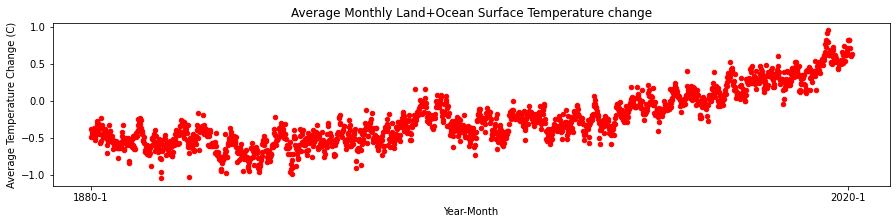

In [32]:
##  plot the data with x being dt column and y the average temperature
##  Specify the figure size because the default size will make things shrink too much
ax=NOAA_dataset.plot(x='Timestamp', y='Ocean-Land Δ(T) (C)', kind='scatter',color='R', xticks=["1880-1","2020-1"], figsize=(15,3))
##  add title to the figure and label for x and y
plt.title('Average Monthly Land+Ocean Surface Temperature change')
plt.xlabel('Year-Month')
plt.ylabel('Average Temperature Change (C)')
plt.show()

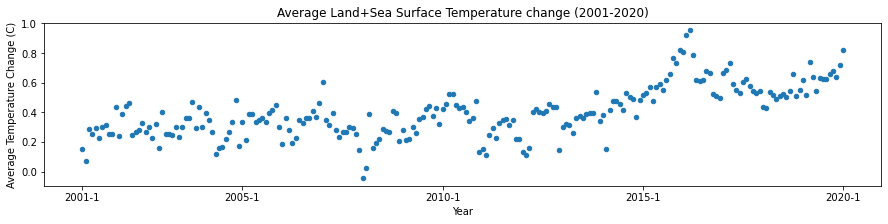

In [34]:
NOAA_dataset_masked.plot.scatter(x='Timestamp', y='Ocean-Land Δ(T) (C)', xticks=[start_date,"2005-1","2010-1","2015-1", end_date], figsize=(15,3))
plt.title('Average Land+Sea Surface Temperature change (2001-2020)')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change (C)')
plt.show()

In [35]:
NOAA_dataset_masked['Ocean-Land Δ(T) (C)'].mean()

0.3997060589519649

In [36]:
NOAA_dataset['Ocean-Land Δ(T) (C)'].median()

-0.318899

## <font color=bblue> Let's practice! </font>  

### (1) Display the entire 60th row in `NOAA_dataset`.

### (2) Display all the values between 1000th and 1025th rows in the `Land Δ(T) (C)` column.

### (3) Display the values in the first 5 rows of the 2nd and 3rd columns of `NOAA_dataset`.

### (4) What is the mean anomaly of sea surface temperature in September 1995?

### (5) What is the average land surface temperature change between May 1984  and October 2000?

### (6) Plot the monthly sea surface temperature anomaly between 1965-1980 and compare it with the merged data (sea+land).

### (7) What is the differentce between the average anomaly of land surface temperature and the average of sea surface temperature in 2000s?

### (8)  As an additional fun. Let's generate some synthetic data. 

To generate a Pandas data frame with n rows and m columns made of ramdom float values between 0 and 1, you can use the following piece of code:

`df = pd.DataFrame(np.random.randn(n, m))`



`df = pd.DataFrame(np.random.randint(0,100,size=(n, m)), columns=list('A1,B1,C1,D1'))`


`df = pd.DataFrame({'A': [11, 21, 31],
                   'B': [12, 22, 32],
                   'C': [13, 23, 33]},
                  index=['ONE', 'TWO', 'THREE'])`

### (a) Now, it's your turn. Generate a Pandas dataframe with 100 rows and 3 columns made of random values between 0 and 50, naming the columns as 'BLUE', 'RED','GREEN' and display the first 8 rows of the data frame.

### (b)  Subtract the values in the 1st column from the ones in the 3rd column, and store them in a new column called 'YELLOW', adding it as a final column in the dataset and display the final version of your data frame.